In [2067]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

loading data set

In [8]:
dataframe = pd.read_csv('weatherHistory.csv')
dataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [9]:
dataframe = dataframe.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'], axis=1)
dataframe.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [10]:
new_columns = {'Temperature (C)':'x1', 'Apparent Temperature (C)':'y', 'Humidity':'x2', 'Wind Speed (km/h)':'x3',
          'Wind Bearing (degrees)':'x4', 'Visibility (km)':'x5', 'Pressure (millibars)':'x6'}

In [11]:
dataframe.rename(columns=new_columns, inplace=True)

In [12]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
y,96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
x2,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
x3,96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
x4,96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
x5,96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
x6,96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [2073]:
dataframe.isna().sum()

x1    0
y     0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

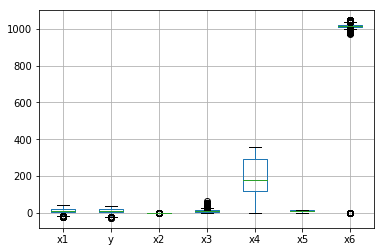

In [2074]:
dataframe.boxplot()

In [2075]:
 dataframe=dataframe.head(500)

In [2076]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,500.0,13.687300,4.558239,3.722222,10.15000,13.022222,17.244444,25.044444
y,500.0,13.300889,5.129404,1.494444,10.15000,13.022222,17.244444,25.044444
x2,500.0,0.742740,0.167093,0.320000,0.62000,0.760000,0.890000,1.000000
x3,500.0,10.194134,6.764105,0.000000,4.78975,9.177000,14.063350,32.167800
x4,500.0,190.222000,103.717111,0.000000,132.75000,169.000000,289.000000,359.000000
x5,500.0,10.435118,3.708072,0.289800,9.98200,10.819200,11.447100,15.874600
x6,500.0,1013.524640,4.040835,1003.570000,1011.34500,1013.910000,1016.520000,1021.010000


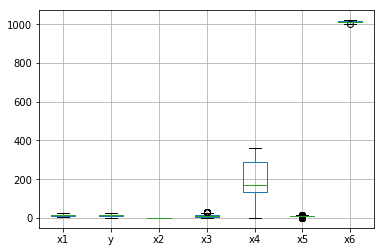

In [2077]:
dataframe.boxplot()


In [17]:
# Separating the output and the parameters data frame
def separate(dataframe):
    output = dataframe.y
    return dataframe.drop('y', axis=1), output

In [18]:
# dataframe = dataframe[(dataframe >= dataframe.quantile(0.25)) & (dataframe<dataframe.quantile(0.75))]
# fucntion to get 
def remove_outlier(dataframe):
    dataframe = dataframe[np.abs(dataframe - dataframe.mean()) <= (3 * dataframe.std())]
    return dataframe

In [19]:
def split(dataframe):
    test_data = dataframe.tail(30).reset_index(drop=True)
    return dataframe.head(len(dataframe)-30), test_data

In [20]:
# using min max
def feature_scaling_column(dataframe, column_scaling):
    mean_of_col = dataframe[column_scaling].mean()
    std_of_col = dataframe[column_scaling].std()
    print('for col= {} mean= {} and std={} '.format(column_scaling,mean_of_col,std_of_col))
    for counter in range(0, len(dataframe)):
        dataframe.loc[counter, column_scaling] =  ((dataframe.loc[counter, column_scaling] - mean_of_col) / std_of_col)
    print("successfully scaled column ",column_scaling)
    return dataframe

In [2082]:
Ypred = pd.Series(np.zeros(len(dataframe)))


In [2083]:
dataframe = remove_outlier(dataframe)

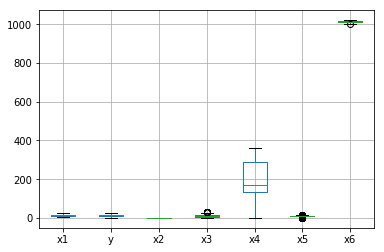

In [2084]:
dataframe.boxplot()

In [2085]:
dataframe.isna().sum()

x1    0
y     0
x2    0
x3    2
x4    0
x5    0
x6    0
dtype: int64

In [16]:
dataframe = dataframe.dropna()
dataframe = dataframe.reset_index(drop=True)

In [2087]:
 dataframe=dataframe.head(500)

In [2088]:
# fig = plt.figure()
# fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, ncols=1, figsize=(5, 10))
# s = np.array(np.random.rand(20))
# for i in range(20):
#     ax1.scatter(i,s[i])

# ax1.plot([0,3],[0,4])
# plt.show()

In [2089]:
class Multi_Linear_Regression():
    
    
    def __init__(self):
        self.learning_rate = 0.001
        self.iteration = 10000
        self.ncols=6
        self.fig = plt.figure()
        self.fig, (self.ax1, self.ax2, self.ax3,self.ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 10))
        
    def train(self, dataframe, output):
        weights = np.full(self.ncols,1.0)
        dframe_size = len(dataframe)
        bais = 1.0

        # Ypred = (dataframe.x1*weight1 + dataframe.x2*weight2 + dataframe.x3*weight3+ dataframe.x4*weight4 + dataframe.x5*weight5 + bais)
        
        self.ax1.scatter(np.linspace(np.min(output),np.max(output),len(output)),output
                         , marker='+', color='g')
        self.ax1.set_title('points scarttered')
        
        for iterations in range(0, self.iteration):
            Ypred = self.classify(dataframe, weights,bais)
            diff = Ypred-output
            # cost = sum(y^ -y)**2)/2m
            cost = np.sum((diff)**2)/(2*dframe_size)
            if(iterations%100==0):
                print('In training iteration: {}, cost {}, bais:{}, weights:{}'
                      .format(iterations, cost,bais,weights))
            if(Ypred.isna().sum()>=1 or output.isna().sum()>=1 or bais == (-np.inf)):
                print('In training iteration: {}, Ypred.isna().sum(): {}, output.isna().sum(): {}, bais:{}, weights:{}'.format(iterations,Ypred.isna().sum(),output.isna().sum(),bais,weights))
                print(Ypred)
                return weights, bais
            
            if(iterations%10==0):
                self.ax2.plot(iterations,cost, markersize=0.3, marker='x', color='r')
                self.ax2.set_title('iteration vs cost')
                self.ax3.plot(bais,cost, markersize=0.3, marker = '+', color='#42f48c')
                self.ax3.set_title('bais vs cost')
#             print('iteration {} diff{} '.format(iterations,np.sum(diff)))
            for counter1 in range(0, self.ncols):
                weights[counter1] -= self.learning_rate*(np.sum(np.multiply(
                                                    diff,dataframe.iloc[:,counter1])))/dframe_size
            bais -= self.learning_rate*(np.sum(diff)/dframe_size)
            
        return weights, bais
        
    def classify(self, dataframe, weights, bais):
        Ypred = pd.Series(np.zeros(len(dataframe)))
        dframe_size = len(dataframe)
        for counter1 in range(0, dframe_size):
            for counter2 in range(0, self.ncols):
                Ypred[counter1] += weights[counter2]*dataframe.iloc[counter1, counter2]
        Ypred = np.add(bais,Ypred)
        return Ypred
        
    def accuracy(self,Ypred, y_output):
        for counter in range(0, len(Ypred)):
            Ypred[counter]= abs(Ypred[counter]-y_output[counter])/y_output[counter]
#         Ypred = np.divide(abs(Ypred-y_output),y_output)
        self.ax4.scatter(Ypred,y_output, marker='+',color='g')
        plt.subplots_adjust(hspace=0.5, wspace = 0.5)
        plt.show()
        self.ax4.set_title("predicted values vs original output")
        error = abs(np.sum(Ypred))/len(Ypred)
        return (1-error)*100
                

In [24]:
def main(dataframe, test_data):
    dataframe, output = separate(dataframe)
    regression_object = Multi_Linear_Regression()
    # feature Scaling:
    weights, bais = regression_object.train(dataframe,output)
    print(weights,bais)
    test_data, output = separate(test_data)
    Ypred = regression_object.classify(test_data, weights, bais)
    print("Accuracy = ", regression_object.accuracy(Ypred,output)) 

In [2091]:
# plt.plot(np.random.rand(20))

In [2092]:
# np.add(4,dataframe)

In [21]:
dataframe, test_data = split(dataframe)

In [2094]:
for item in dataframe:
    dataframe = feature_scaling_column(dataframe, item)

for col= x1 mean= 13.484603513770182 and std=4.527030087168115 
successfully scaled column  x1
for col= y mean= 13.091203703703705 and std=5.088003798341913 
successfully scaled column  y
for col= x2 mean= 0.7453632478632478 and std=0.16719398680738062 
successfully scaled column  x2
for col= x3 mean= 10.023316452991454 and std=6.6892966861053065 
successfully scaled column  x3
for col= x4 mean= 193.29273504273505 and std=105.37191088945363 
successfully scaled column  x4
for col= x5 mean= 10.393306837606838 and std=3.8075887175830565 
successfully scaled column  x5
for col= x6 mean= 1013.7181623931625 and std=4.069368843321262 
successfully scaled column  x6


In [2095]:
# from IPython.core.debugger import Tracer; Tracer()()
# dataframe.isnan().sum()


In training iteration: 0, cost 1.9863876722767322, bais:1.0, weights:[1. 1. 1. 1. 1. 1.]
In training iteration: 100, cost 1.6749883500278433, bais:0.9047921471137114, weights:[1.05682282 0.95971921 0.94367396 0.9018112  0.93960496 0.97268453]
In training iteration: 200, cost 1.4207691009907149, bais:0.8186488294786407, weights:[1.10480167 0.92489832 0.89255166 0.81406062 0.88234671 0.94297649]
In training iteration: 300, cost 1.211757061793063, bais:0.740707032156106, weights:[1.14538024 0.8945001  0.84594212 0.73551868 0.8282652  0.91166042]
In training iteration: 400, cost 1.0388177374678245, bais:0.6701859060067493, weights:[1.17975054 0.8676884  0.80325732 0.66512011 0.77734281 0.87936532]
In training iteration: 500, cost 0.8949050266503571, bais:0.6063789448611955, weights:[1.20889814 0.84378973 0.76399649 0.60193933 0.72951927 0.84659262]
In training iteration: 600, cost 0.7745265015901236, bais:0.5486469074855088, weights:[1.2336392  0.82226202 0.7277328  0.54516979 0.68470337 0

In training iteration: 5300, cost 0.02859094739474422, bais:0.004978374892585953, weights:[1.2811004  0.37539936 0.09418559 0.02280752 0.09750382 0.09843122]
In training iteration: 5400, cost 0.027752939401861916, bais:0.0045043945082000976, weights:[1.27790547 0.36996983 0.08936472 0.02238973 0.09564325 0.09430614]
In training iteration: 5500, cost 0.02696073009435204, bais:0.004075540778521834, weights:[1.27471873 0.36464208 0.08470753 0.02201032 0.09386689 0.09036756]
In training iteration: 5600, cost 0.026211157472480467, bais:0.0036875172916485018, weights:[1.27154238 0.35941391 0.08020837 0.02166493 0.09216883 0.08660686]
In training iteration: 5700, cost 0.025501325490314024, bais:0.003336436687829818, weights:[1.26837842 0.35428319 0.07586176 0.02134961 0.09054357 0.08301588]
In training iteration: 5800, cost 0.02482857743168221, bais:0.003018781714490727, weights:[1.26522869 0.34924782 0.0716624  0.02106082 0.08898609 0.07958684]
In training iteration: 5900, cost 0.02419047240

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

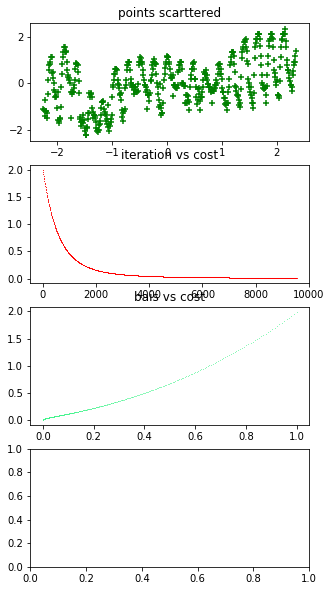

In [2096]:
main(dataframe,test_data)

In [ ]:
yd = pd.Series(dataframe.x1)

In [ ]:
yd.head()

In [2099]:
dataframe.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [1]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("weatherHistory.csv")
X = dataframe.drop(columns="Apparent Temperature (C)")
y = dataframe["Apparent Temperature (C)"]

In [3]:
from sklearn.preprocessing import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_set = 0.3)

ModuleNotFoundError: No module named 'sklearn'

In [5]:
pip install sklearn

/bin/sh: 1: /home/admin1/PycharmProjects/Machine: not found
Note: you may need to restart the kernel to use updated packages.


In [26]:
dataframe, output = separate(dataframe)

dataframe.head()

,x1,x2,x3,x4,x5,x6
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [27]:
output.head()

0    7.388889
1    7.227778
2    9.377778
3    5.944444
4    6.977778
Name: y, dtype: float64

In [29]:
dataframe.iloc[:,0].head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: x1, dtype: float64

In [30]:
dataframe.iloc[1, 2]

14.2646